## Bayesian Linear Regression

In [176]:
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

In [177]:
N = 100
x = np.random.normal(10,1,N)
print(x)
eps = np.random.normal(0,0.5,size=N)

alpha_real = 2.5  
beta_real = 0.9 

y_real = alpha_real + beta_real*x 

y = y_real + eps 

[11.99357583 11.61184528  9.25244795  9.21866766  8.77518144 10.42584497
  9.8759565  10.6627488  10.15001176  9.63944198  8.21069534  8.17547873
  8.74981871  9.62865872 10.44055208  9.5328262  10.83777448  9.19109929
 11.66281154 11.39085264  8.59930908  9.94269469  9.12115634  9.82754917
 10.27281718  8.76134097  8.97390649 10.67717763 10.59622388  8.38912723
  9.70155797 10.53842597 10.94786201 10.70640381  9.59940793  9.67666301
  9.79187034  8.70320556  9.83844113 10.44187972  9.77330119 10.33087132
  9.97237764 11.17182019 11.16848835 10.4250025   9.43317918 10.6247537
  9.71113793 10.45707944  9.19727784 10.39646551 11.0045539  10.09111094
 10.64816145 10.01903106  9.01189912 11.54791263 10.85396029 11.76265359
 10.50318933  8.42645351 10.8280754   9.39652818 10.99109925 10.17480863
  9.506303    7.93372939  8.33382455  9.92557465 10.18654932  8.76639667
  9.7403363   9.59643058 10.50131637 11.52890359 10.90549785  8.83660681
 10.77522387  9.91961634 10.81126017 10.23633056  9.

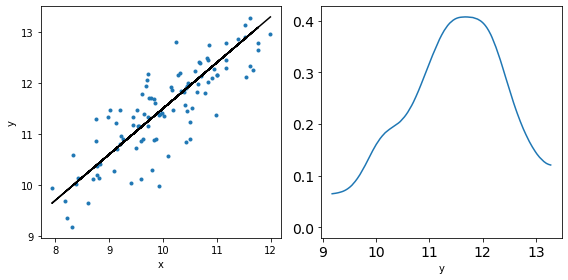

In [178]:
_, ax = plt.subplots(1,2,figsize=(8,4))
ax[0].plot(x,y,'C0.')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].plot(x,y_real,'k')
az.plot_kde(y,ax=ax[1])
ax[1].set_xlabel('y')
plt.tight_layout()

In [179]:
!pip install pymc3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [180]:
import pymc3 as pm

with pm.Model() as model_g:
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=1)
    ϵ = pm.HalfCauchy('ϵ', 5)

    μ = pm.Deterministic('μ', α + β * x)
    y_pred = pm.Normal('y_pred', mu=α + β * x, sd=ϵ, observed=y)

    trace_g = pm.sample(2000, tune=800,return_inferencedata=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7903296d0>,
      dtype=object)

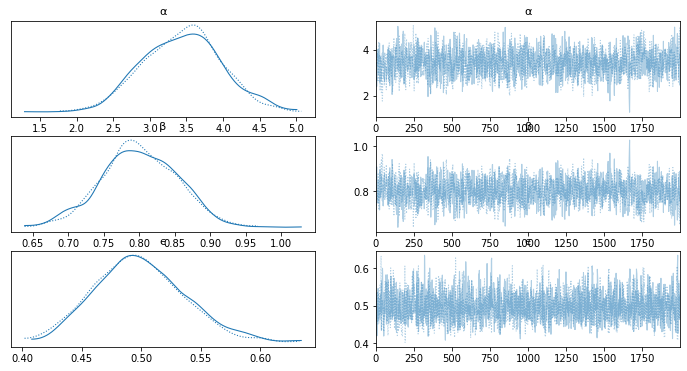

In [181]:
az.plot_trace(trace_g, var_names=['α', 'β', 'ϵ'])

In [182]:
az.summary(trace_g)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α,3.443,0.536,2.381,4.384,0.016,0.011,1171.0,1237.0,1.0
β,0.800,0.053,0.705,0.905,0.002,0.001,1164.0,1253.0,1.0
ϵ,0.499,0.038,0.431,0.569,0.001,0.001,1703.0,1488.0,1.0
μ[0],13.044,0.117,12.823,13.261,0.003,0.002,1384.0,1389.0,1.0
μ[1],12.738,0.099,12.541,12.910,0.003,0.002,1481.0,1405.0,1.0
...,...,...,...,...,...,...,...,...,...
μ[95],12.863,0.106,12.652,13.047,0.003,0.002,1434.0,1382.0,1.0
μ[96],11.124,0.054,11.023,11.226,0.001,0.001,2450.0,2844.0,1.0
μ[97],11.004,0.058,10.893,11.110,0.001,0.001,2121.0,2826.0,1.0
μ[98],10.490,0.081,10.344,10.649,0.002,0.001,1496.0,1973.0,1.0


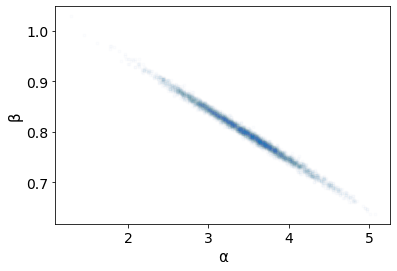

In [183]:
az.plot_pair(trace_g,var_names=['α','β'], scatter_kwargs={'alpha': 0.01})

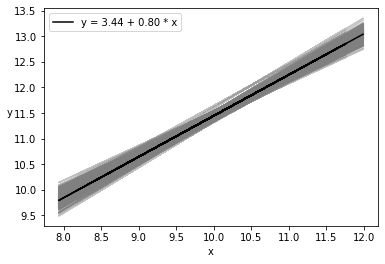

In [184]:
#plt.plot(x, y, 'C0.')

res = az.summary(trace_g)
alpha_m = res.loc['α']['mean']
beta_m  = res.loc['β']['mean']

#print(res)


trace_a = trace_g['posterior']['α'][0].values 
trace_b = trace_g['posterior']['β'][0].values 

draws = range(0, len(trace_g['posterior']['α'][0]), 10)

plt.plot(x, trace_a[draws] + trace_b[draws]
         * x[:, np.newaxis], c='gray', alpha=0.5);

plt.plot(x, alpha_m + beta_m * x, c='k',
         label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x');

plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.legend();


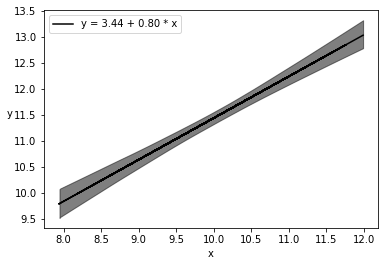

In [185]:
plt.plot(x, alpha_m + beta_m * x, c='k',
         label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')

sig = az.plot_hdi(x, trace_g.posterior['μ'], hdi_prob=0.98, color='k')

plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.legend()



In [186]:
ppc = pm.sample_posterior_predictive(trace_g, samples=2000, model=model_g)

/usr/local/lib/python3.7/dist-packages/pymc3/sampling.py:1709: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


/usr/local/lib/python3.7/dist-packages/arviz/plots/hdiplot.py:157: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)
/usr/local/lib/python3.7/dist-packages/arviz/plots/hdiplot.py:157: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


Text(0, 0.5, 'y')

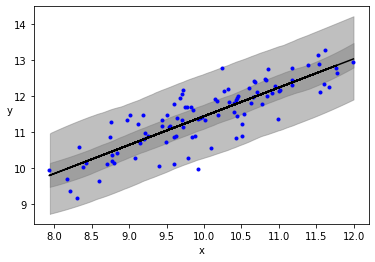

In [187]:
plt.plot(x, y, 'b.')


plt.plot(x, alpha_m + beta_m * x, c='k',
         label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')


az.plot_hdi(x, ppc['y_pred'], hdi_prob=0.5, color='gray')
az.plot_hdi(x, ppc['y_pred'], hdi_prob=0.98, color='gray')

plt.xlabel('x')
plt.ylabel('y', rotation=0)


ϵ